In [3]:
from google.colab import drive
drive.mount('./contents')

Mounted at ./contents


In [5]:
cd contents/MyDrive/working/yolov5

/content/contents/MyDrive/working/yolov5


# xray 폴더 생성 및 다운로드 받은 이미지, 레이블 옮기기

In [8]:
!mkdir xray
!mv /content/contents/MyDrive/working/dataset/test1/yolov3/labels /content/contents/MyDrive/working/yolov5/xray
!mv /content/contents/MyDrive/working/dataset/test1/yolov3/images /content/contents/MyDrive/working/yolov5/xray

In [11]:
!ls xray
!ls xray/images

images	labels
'001_20200622_203312(6).jpg'  '002_20200714_043029(1).jpg'  '002_20200915_003459(4).jpg'
'001_20200623_003516(8).jpg'  '002_20200715_042416(9).jpg'  '002_20200917_043110(7).jpg'
'001_20200901_003429(1).jpg'  '002_20200831_083545(0).jpg'  '002_20200917_202952(6).jpg'
'001_20200922_163329(0).jpg'  '002_20200831_123134(5).jpg'  '002_20200917_203001(5).jpg'
'001_20200922_163332(2).jpg'  '002_20200908_043137(8).jpg'  '002_20200922_083747(7).jpg'


In [12]:
!mkdir xray/test
!mv xray/images xray/test
!mv xray/labels xray/test

In [16]:
!ls xray && ls xray/test

test
images	labels


# 이미지 확인

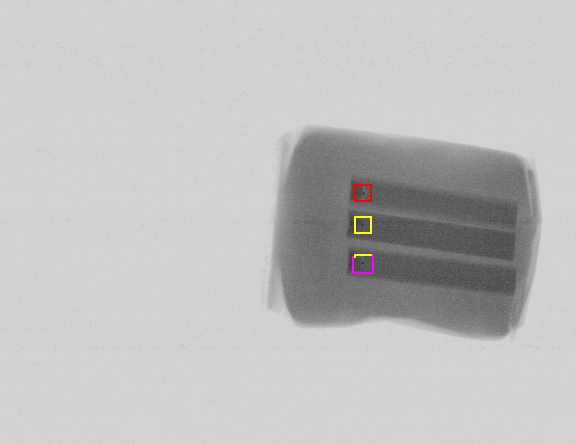

In [58]:
from IPython.display import Image, display

Image(filename='xray/test/images/001_20200622_203312(6).jpg', width=600)

In [ ]:
!ls xray && ls xray/test

test
images	labels


# 그 외 images, labels 옮기기

In [ ]:
ls /content/contents/MyDrive/working/dataset/라벨링\ 6종\ 세트/images*/*.jpg
# '/content/contents/MyDrive/working/dataset/라벨링 6종 세트/images 400/002_20200715_002509(0).jpg'

In [22]:
ls xray

test/


In [ ]:
!mkdir -p xray/train/images
!cp /content/contents/MyDrive/working/dataset/라벨링\ 6종\ 세트/images*/*.jpg xray/train/images
!mv /content/contents/MyDrive/working/dataset/라벨링\ 6종\ 세트/labels xray/train
# cp: will not overwrite just-created 'xray/train/images/001_20200622_203330(3).jpg' with '/content/contents/MyDrive/working/dataset/라벨링 6종 세트/images 15/001_20200622_203330(3).jpg'

In [24]:
ls xray/train

images/  labels/


# 갯수 확인

In [26]:
import glob

imgs = glob.glob('xray/train/images/*.jpg')
labels = glob.glob('xray/train/labels/*.txt')

In [42]:
imgs[0], labels[0]

('xray/train/images/001_20200622_203305(8).jpg',
 'xray/train/labels/001_20200623_082416(7).txt')

In [28]:
print(len(imgs), len(labels))

400 500


In [32]:
import os
imgs_data = os.listdir('xray/train/images')
labels_data = os.listdir('xray/train/labels')

In [37]:
sorted(imgs_data)[0], sorted(labels_data)[0]

('001_20200622_203305(8).jpg', '001_20200622_203305(8).txt')

In [41]:
imgs_data.sort()
labels_data.sort()
imgs_data[0][:-4] == labels_data[0][:-4]

True

In [43]:
temp_imgs = list(map(lambda x: x[:-4], imgs_data))
temp_labels = list(map(lambda x: x[:-4], labels_data))

In [94]:
use_labels = []
no_labels = []
for label in temp_labels:
    if label in temp_imgs:
        use_labels.append(label +'.txt')
    else:
        no_labels.append(label +'.txt')
print(len(use_labels))

400


In [96]:
len(no_labels)

100

In [54]:
import os

new_labels = [os.path.join('xray/train/labels/', label) for label in use_labels]

# train validate split

In [69]:
import math

max_len = len(imgs) # 400
train_len = math.floor(max_len * 0.8)

imgs.sort()

train_imgs = imgs[:train_len]
train_labels = new_labels[:train_len]

val_imgs = imgs[train_len:]
val_labels = new_labels[train_len:]

print(f'trian : {len(train_imgs)}, {len(train_labels)}')
print(f'valid : {len(val_imgs)}, {len(val_labels)}')

trian : 320, 320
valid : 80, 80


In [71]:
train_imgs[0]

'xray/train/images/001_20200622_203305(8).jpg'

# double check : 같은 이름을 가진 파일인지 재 확인

In [76]:
tmp_img1 = list(map(lambda x: x[18:-4], train_imgs))
tmp_label1 = list(map(lambda x: x[18:-4], train_labels))

tmp_img2 = list(map(lambda x: x[18:-4], val_imgs))
tmp_label2 = list(map(lambda x: x[18:-4], val_labels))

In [77]:
tmp1 = []
tmp2 = []

for i, j in zip(tmp_img1, tmp_label1):
    if i == j:
        tmp1.append(1)
for i, j in zip(tmp_img2, tmp_label2):
    if i == j:
        tmp2.append(1)
print(sum(tmp1), sum(tmp2))

320 80


# test 갯수 확인

In [78]:
test_imgs = glob.glob('xray/test/images/*.jpg')
test_labels = glob.glob('xray/test/labels/*.txt')

print(len(test_imgs), len(test_labels))

15 15


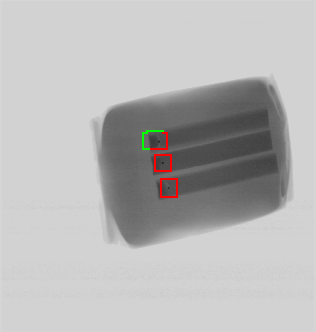

In [82]:
Image(train_imgs[-1])

In [86]:
shutil.move

<function shutil.move(src, dst, copy_function=<function copy2 at 0x7f51337020e0>)>

In [88]:
ls xray

test/  train/


In [89]:
!mkdir -p xray/valid/images xray/valid/labels

In [90]:
ls xray/valid

images/  labels/


In [91]:
import shutil

img_dst = 'xray/valid/images'
label_dst = 'xray/valid/labels'

for img_src, label_src in zip(val_imgs, val_labels):
    shutil.move(img_src, img_dst)
    shutil.move(label_src, label_dst)

# Double Check : 잘 옮겨졌는지 재 확인

In [92]:
import os

temp_ti = os.listdir('xray/train/images')
temp_tl = os.listdir('xray/train/labels')

temp_vi = os.listdir('xray/valid/images')
temp_vl = os.listdir('xray/valid/labels')

print(f'train : {len(temp_ti)}, {len(temp_tl)}')
print(f'val : {len(temp_vi)}, {len(temp_vl)}')

train : 320, 420
val : 80, 80


# 안쓰는 labels 를 etc 폴더에 옮기기

In [11]:
!mkdir xray/etc
!ls xray

etc  test  train  valid


In [12]:
import os
import shutil

not_use = [os.path.join('xray/train/labels', label) for label in no_labels]

no_dst = 'xray/etc'
for no_src in not_use:
    shutil.move(no_src, no_dst)

tl = os.listdir('xray/train/labels')
etc = os.listdir('xray/etc')
print(len(tl), len(etc))

320 100


# Triple Check :  갯수 맞는지 확인

In [13]:
import os

temp_ti = os.listdir('xray/train/images')
temp_tl = os.listdir('xray/train/labels')

temp_vi = os.listdir('xray/valid/images')
temp_vl = os.listdir('xray/valid/labels')

print(f'train : {len(temp_ti)}, {len(temp_tl)}')
print(f'val : {len(temp_vi)}, {len(temp_vl)}')

train : 320, 320
val : 80, 80
